# **Criando Carteira de Ações**

Importar bibliotecas Python:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Criar lista contendo as siglas das ações a analisar:

In [3]:
acoes = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR4.SA', 'BBAS3.SA', 'BOVA11.SA']

Gerar o "data frame" através da variável -> 'acoes_df', e utilizar o yfinance para fazer downloads das ações no periodo desejado:

In [4]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01', end='2020-11-04')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Visualização da tabela:

In [5]:
acoes_df

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,9.37,37.820000,9.360000,22.650000,47.259998
2015-01-05,15.730000,9.62,37.070000,8.560000,22.180000,46.320000
2015-01-06,16.330000,9.55,36.150002,8.280000,22.490000,46.580002
2015-01-07,16.559999,9.69,37.389999,8.670000,23.480000,48.150002
2015-01-08,16.540001,9.66,38.910000,9.230000,23.559999,48.509998
...,...,...,...,...,...,...
2020-10-27,13.720000,14.00,43.480000,19.879999,32.779999,95.680000
2020-10-28,13.370000,12.97,42.610001,18.670000,31.139999,91.559998
2020-10-29,12.890000,12.84,42.250000,19.290001,30.959999,92.800003


Verificar se há valores nulos:

In [6]:
acoes_df.isnull().sum()

ABEV3.SA      0
ODPV3.SA      0
VIVT3.SA      0
PETR4.SA      0
BBAS3.SA      0
BOVA11.SA    27
dtype: int64

Eliminando e verificando se os valores nulos fora eliminados:

In [7]:
acoes_df.dropna(inplace=True)
acoes_df.isnull().sum()

ABEV3.SA     0
ODPV3.SA     0
VIVT3.SA     0
PETR4.SA     0
BBAS3.SA     0
BOVA11.SA    0
dtype: int64

Alterando os nomes das colunas do Data Frame:

In [8]:
acoes_df = acoes_df.rename(columns={'ABEV3.SA': 'AMBV', 'ODPV3.SA': 'ODONT', 'VIVT3.SA': 'VIVO', 
                    'PETR4.SA': 'PETRO', 'BBAS3.SA': 'BBRAS', 'BOVA11.SA': 'BOVA'}) 

Criando arquivo '.csv':

In [9]:
acoes_df.to_csv('acoes.csv')


Lendo arquivo '.csv':

In [10]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.360000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.560000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.280000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.670000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.230000,23.559999,48.509998
...,...,...,...,...,...,...,...
1421,2020-10-27,13.720000,14.00,43.480000,19.879999,32.779999,95.680000
1422,2020-10-28,13.370000,12.97,42.610001,18.670000,31.139999,91.559998
1423,2020-10-29,12.890000,12.84,42.250000,19.290001,30.959999,92.800003
1424,2020-10-30,12.180000,12.61,42.669998,18.940001,29.799999,90.660004


Descrevendo as ações:


-> As ações da Ibovespa 'BOVA' foram as que apresentaram o maior indice de desvio padrão(std).

In [11]:
acoes_df.describe()

,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,18.116164,13.324727,40.617567,17.317735,32.005056,71.662896
std,2.437135,2.327923,5.266726,6.985286,10.904140,19.970061
min,11.030000,9.000000,28.980000,4.200000,12.700000,36.450001
25%,17.250000,11.300000,36.665000,12.210000,23.342500,53.272500
50%,18.510000,13.145000,40.565001,15.900000,30.825000,70.805000
75%,19.340000,15.350000,43.950001,22.877500,39.780001,90.565001
max,24.270000,18.430000,56.740002,30.969999,55.180000,115.209999


Normalizando as taxas:

In [12]:
acoes_normalizadas = acoes_df.copy()
for i in acoes_normalizadas.columns[1:]:
    acoes_normalizadas[i] = acoes_normalizadas[i] / acoes_normalizadas[i][0]

acoes_normalizadas 

,Date,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.914530,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.884615,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.926282,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,0.986111,1.040177,1.026449
...,...,...,...,...,...,...,...
1421,2020-10-27,0.856429,1.494130,1.149656,2.123932,1.447241,2.024545
1422,2020-10-28,0.834582,1.384205,1.126653,1.994658,1.374834,1.937368
1423,2020-10-29,0.804619,1.370331,1.117134,2.060898,1.366887,1.963606
1424,2020-10-30,0.760300,1.345784,1.128239,2.023504,1.315673,1.918324


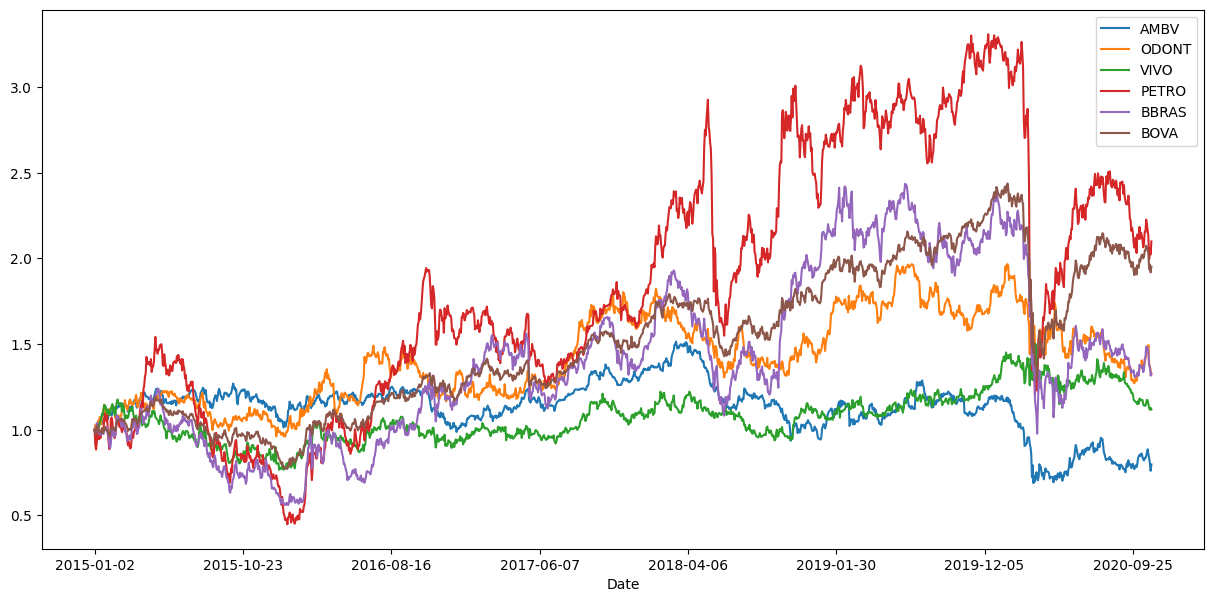

In [13]:
acoes_normalizadas.plot(x='Date', figsize=(15, 7));

Apagando a coluna data:

Efetuando o comparativo de todas as ações no mesmo periodo de tempo.

In [17]:
retorno_carteira = (acoes_normalizadas / acoes_normalizadas.shift(1)) - 1
retorno_carteira.head()  # ".head()" -> para ler os 5 primeiras linhas do data frame

,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.085470,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.032710,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.047101,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.064590,0.003407,0.007477


Adicionando novamente a coluna no DataFrame:

In [18]:
# Supondo que você já tenha removido a coluna "Date"
# acoes_normalizadas.drop(labels=['Date'], axis=1, inplace=True)

# Adicionando a coluna "Date" de volta no inicio do Dataframe
acoes_normalizadas.insert(0, 'Date', pd.date_range(start='2022-01-01', periods=len(acoes_normalizadas), freq='D'))

# Se quiser adicionar datas específicas, pode fazer algo como:
# acoes_normalizadas['Date'] = ['2022-01-01', '2022-01-02', '2022-01-03', ...]

# Exibindo o DataFrame resultante
acoes_normalizadas


,Date,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA
0,2022-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2022-01-02,0.981898,1.026681,0.980169,0.914530,0.979249,0.980110
2,2022-01-03,1.019351,1.019210,0.955844,0.884615,0.992936,0.985612
3,2022-01-04,1.033708,1.034152,0.988630,0.926282,1.036645,1.018832
4,2022-01-05,1.032459,1.030950,1.028821,0.986111,1.040177,1.026449
...,...,...,...,...,...,...,...
1421,2025-11-22,0.856429,1.494130,1.149656,2.123932,1.447241,2.024545
1422,2025-11-23,0.834582,1.384205,1.126653,1.994658,1.374834,1.937368
1423,2025-11-24,0.804619,1.370331,1.117134,2.060898,1.366887,1.963606
1424,2025-11-25,0.760300,1.345784,1.128239,2.023504,1.315673,1.918324


Calculando o retorno anual da carteira de cada ação

In [19]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

AMBV    -0.001321
ODONT    0.098078
VIVO     0.070810
PETRO    0.272298
BBRAS    0.162370
BOVA     0.153039
dtype: float64

Transformamos os resultados para percentual!

In [20]:
retorno_anual = retorno_anual * 100
retorno_anual

AMBV     -0.132054
ODONT     9.807845
VIVO      7.081034
PETRO    27.229767
BBRAS    16.236952
BOVA     15.303889
dtype: float64

Adicionando peso para cada ação:

Obs.: em relação a ação da BOVA mantemos o peso zerado (0.0) pois iremos desconsidera-lo

In [21]:
peso_acoes = pd.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

Somando o peso das acões da carteira:

In [22]:
peso_acoes.sum()

1.0

"np.dot()" -> tem a função de multiplicar o valor do "retorno_anual" de cada ação pelos "pesos_carteira1" referentes à cada ação da carteira, e em seguida soma-los para achar a "taxa de retorno" conforme resultado abaixo:

In [23]:
np.dot(retorno_anual, peso_acoes)

12.044708684251589

**Visualizando o percentual da taxa de retorno anual individualizada:**

_________________________________________________________________________________________________________________________________________________________________

*Comparando o resultado da taxa de retorno anual das empresas que compõem a carteira de ações com a ação "BOVA" que é a carteira da Ibovespa que contem um grupo de empresas que tem as melhores empresas da bolsa do Brasil. E com isso percebemos que o valor percentual médio de "12.04%" da carteira é inferior em relação a média percentual de "15.30%" da Carteira da Ibovespa('BOVA')!*

_________________________________________________________________________________________________________________________________________________________________

In [24]:
retorno_anual['BOVA']

15.303889411673142

Criamos nova coluna chamada "CARTEIRA" e adicionamos a média de todos os valores das ações por data

In [25]:
acoes_normalizadas['CARTEIRA'] = (acoes_normalizadas['AMBV'] + acoes_normalizadas['ODONT'] 
                                  + acoes_normalizadas['VIVO'] + acoes_normalizadas['PETRO'] + acoes_normalizadas['BBRAS'])
acoes_normalizadas

,Date,AMBV,ODONT,VIVO,PETRO,BBRAS,BOVA,CARTEIRA
0,2022-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
1,2022-01-02,0.981898,1.026681,0.980169,0.914530,0.979249,0.980110,4.882527
2,2022-01-03,1.019351,1.019210,0.955844,0.884615,0.992936,0.985612,4.871956
3,2022-01-04,1.033708,1.034152,0.988630,0.926282,1.036645,1.018832,5.019416
4,2022-01-05,1.032459,1.030950,1.028821,0.986111,1.040177,1.026449,5.118518
...,...,...,...,...,...,...,...,...
1421,2025-11-22,0.856429,1.494130,1.149656,2.123932,1.447241,2.024545,7.071388
1422,2025-11-23,0.834582,1.384205,1.126653,1.994658,1.374834,1.937368,6.714932
1423,2025-11-24,0.804619,1.370331,1.117134,2.060898,1.366887,1.963606,6.719869
1424,2025-11-25,0.760300,1.345784,1.128239,2.023504,1.315673,1.918324,6.573501


Geramos um gráfico dinâmico para comparar as ações separadas X carteira recem criada: 

In [26]:
# Normalizar os dados se ainda não estiverem normalizados
for i in acoes_normalizadas.columns[1:]:
    acoes_normalizadas[i] = acoes_normalizadas[i] / acoes_normalizadas[i][0]

# Adicionando a coluna 'CARTEIRA'
acoes_normalizadas['CARTEIRA'] = acoes_normalizadas.drop(columns=['Date']).mean(axis=1)

# Criar o gráfico com hover_data
grafico = px.line(
    acoes_normalizadas,
    x='Date',
    y=acoes_normalizadas.columns[1:],  # Ações individuais e 'CARTEIRA'
    title='Comparativo: CARTEIRA X BOVA',
    hover_data={'Date': '|%B %d, %Y'},  # Exibe a data formatada
    labels={'value': 'Valor Normalizado', 'variable': 'Ação'},
)

# Configurar o layout do gráfico
grafico.update_layout(xaxis_title='Data', yaxis_title='Valor Normalizado', legend_title='Ações')

# Mostrar o gráfico
grafico.show()


Gráfico somente comparando as ações: 'CARTEIRA'  x 'BOVA'

In [31]:
# Normalizar os dados se ainda não estiverem normalizados
for i in acoes_normalizadas.columns[1:]:
    acoes_normalizadas[i] = acoes_normalizadas[i] / acoes_normalizadas[i][0]

# Criar o gráfico com hover_data
grafico = px.line(
    acoes_normalizadas,
    x='Date',
    y=acoes_normalizadas.columns[6:],  # BOVA e 'CARTEIRA'
    title='Comparativo: CARTEIRA X BOVA',
    hover_data={'Date': '|%B %d, %Y'},  # Exibe a data formatada
    labels={'value': 'Valor Normalizado', 'variable': 'Ação'},
)

# Configurar o layout do gráfico
grafico.update_layout(xaxis_title='Data', yaxis_title='Valor Normalizado', legend_title='Ações')

# Mostrar o gráfico
grafico.show()